# Task 2: Visualizing fire scars through false color
#### Author: Sofia Rodas

- Homework 4 GitHub repository: https://github.com/sofiiir/eds220-hwk4.git

## About

**1. Purpose:** 
- This notebook explores maps NASA  and USGS Landsat8 data and National Interagency Fire Center (NIFC) fire boundaries data depicting the Eaton and Palisades Fires that occured in January of 2025. The final result is a false color map showing clear colorations of the fore scars with an overlay of the official fire boundaries.


**2.  Highlights:** 
- Landsat data is read in with NetCDF. No CRS is originally assigned to the entire Landsat data. The CRS is held in the `spatial_ref` variable. The GeoSpatial data must be restored by using the CRS from the `spatial_ref` variable. 

- Landsat data is versatile. Landsat 8 has 11 bands that can be selected to make a variety of coloration maps. For example, the red, green, and blue bands (in that order) can be selected to create a true coloration map. 

- False color Landsat maps are created by selecting the short-wave infrared (swir22), near-infrared (nir), and red bands (in that order). This map best depicts the fire scars on the landscape. The final map shows the fire scars with the additional boundaries of the fires being included for clarity. 


**3. Datasets description:** 
- Eaton Fire perimeter: The fire perimeter data was acquired from the Los Angeles County official GIS catalogue. This Los Angeles County GIS data is originally from the National Interagency Fire Center (NIFC) through the Fire Integrated Real-time Intelligence System (FIRIS). It contains the boundary of the Eaton Fire.

- Palisades Fire perimeter: The fire perimeter data was acquired from the Los Angeles County official GIS catalogue. This Los Angeles County GIS data is originally from the National Interagency Fire Center (NIFC) through the Fire Integrated Real-time Intelligence System (FIRIS). It contains the boundary of the Palisades Fire.

- Landsat8: NASA Landsat satellites in conjunction with USGS acquire data using 11 bands through the use of Operational Land Imager (OLI) and the Thermal Infrared Sensor (TIRS). Landsat satellites orbit earth at a rate of 16 days per cycle.

**4. Refrences:** 

- Earth Resources Observation and Science (EROS) Center. (2020). Landsat 8-9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2 [dataset]. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6 [Accessed November 17 ,2025]

- NIFC FIRIS(2025).Palisades and Eaton Dissolved Fire Perimeters (2025) [Shapefile]. County of Los Angeles. https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about. [Retrieved November 17, 2025]


## Fire Perimeter Data Import and Preparation

In [1]:
# Import packages
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow

## Fire perimeter data exploration

The fire perimeter data was acquired from the City of Los Angeles official GeoHUB. The City of Los Angeles fire perimeter data is originally from the National Interagency Fire Center (NIFC) through the Fire Integrated Real-time Intelligence System (FIRIS).

Note: Shapefiles are read in with `geopandas`. 

Read in the shape files:


In [2]:
# ------ IMPORT DATASETS ------

fp = os.path.join('data', 'eaton_fire_perimeter', 'Eaton_Perimeter_20250121.shp')
eaton_fire = gpd.read_file(fp)

fp = os.path.join('data', 'palisades_fire_perimeter', 'Palisades_Perimeter_20250121.shp')
palisades_fire = gpd.read_file(fp)

#### Eaton Fire Perimeter exploration

<Axes: >

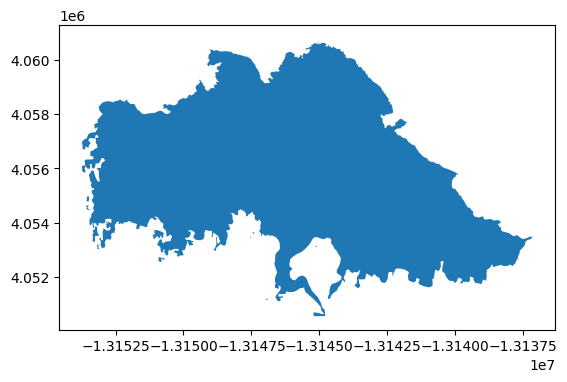

In [3]:
# Initial plot of the Eaton Fire perimeter 
eaton_fire.plot()

In [4]:
# Check the CRS for Eaton fire perimeter
print(f'The Eaton Fire Perimeter is in the CRS: {eaton_fire.crs.name}')

The Eaton Fire Perimeter is in the CRS: WGS 84 / Pseudo-Mercator


In [5]:
# Check if the CRS is projected or geographic
print(f"Is the Eaton Fire Perimeter CRS geographic? {eaton_fire.crs.is_geographic}")
print(f"Is the Eaton Fire Perimater CRS projected? {eaton_fire.crs.is_projected}")

Is the Eaton Fire Perimeter CRS geographic? False
Is the Eaton Fire Perimater CRS projected? True


In [6]:
# Look at the column names and data types of the Eaton Fire shapefile
eaton_fire.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


#### Palisades Fire Perimeter exploration

<Axes: >

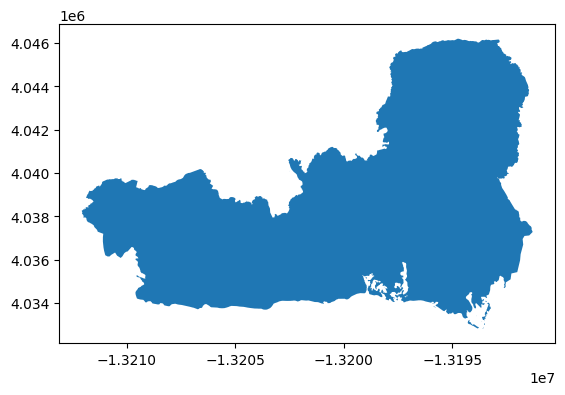

In [7]:
# Initial plot of the Palisades Fire perimeter
palisades_fire.plot()

In [8]:
# Check the CRS for Palisades Fire perimeter
print(f'The Palisades Fire Perimeter is in the CRS: {palisades_fire.crs.name}')

The Palisades Fire Perimeter is in the CRS: WGS 84 / Pseudo-Mercator


In [9]:
# Check if the CRS is projected or geographic
print(f"Is the Palisades Fire Perimeter CRS geographic? {palisades_fire.crs.is_geographic}")
print(f"Is the Palisades Fire Perimater CRS projected? {palisades_fire.crs.is_projected}")

Is the Palisades Fire Perimeter CRS geographic? False
Is the Palisades Fire Perimater CRS projected? True


In [10]:
# Look at the column names and data types of the Palisades Fire shapefile
palisades_fire.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes


#### Eaton Fire perimeter summary
The Eaton Fire perimeter is projected in the WGS 1984 Web Mercator CRS. The CRS is projected. The Eaton Fire perimeter includes geometry and was priliminarily plotted above.

#### Palisades Fire perimeter summary
The Palisade Fire perimeter is projected in the WGS 1984 Web Mercator CRS. The CRS is projected. The Palisades Fire perimeter includes geometry and was priliminarily plotted above.

## NetCDF Data Import and Preparation

Note: Landsat data is raster data. It is read in with `xarray`.

Read in the Landsat8 data:

In [11]:
# Import the NetCDF data
fp = os.path.join('data', 'landsat8-2025-02-23-palisades-eaton.nc')
landsat = xr.open_dataset(fp)

In [12]:
# Look at the variables, dimensions, and coordinates
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [13]:
# Check the CRS for the x coordinates
landsat.x.crs

'EPSG:32611'

Reviewing the attributes of the x and y coordinates provides information on the units of measurement for the CRS and whether the CRS is projected or geographic. The resolution of the data is also noted in the attributes.

In [14]:
# View the attributes of the x coordinate
landsat.x

<xarray.DataArray 'x' (x: 2742)> Size: 22kB
array([334410., 334440., 334470., ..., 416580., 416610., 416640.])
Coordinates:
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...
Attributes:
    units:          metre
    resolution:     30.0
    crs:            EPSG:32611
    axis:           X
    long_name:      x coordinate of projection
    standard_name:  projection_x_coordinate

In [15]:
# Check the CRS for the y coordinates
landsat.y.crs

'EPSG:32611'

In [16]:
# View the attributes of the y coordinate
landsat.y

<xarray.DataArray 'y' (y: 1418)> Size: 11kB
array([3799050., 3799020., 3798990., ..., 3756600., 3756570., 3756540.])
Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
    time     datetime64[ns] 8B ...
Attributes:
    units:          metre
    resolution:     -30.0
    crs:            EPSG:32611
    axis:           Y
    long_name:      y coordinate of projection
    standard_name:  projection_y_coordinate

#### Landsat8 Data Summary

Landsat8 data has the dimensions 1418 by 2742. Since the CRS is projected the dimensions are in meters. The coordinates contain an x and y in the CRS 'EPSG: 32611'. The variables `red`, `green`, `blue`, `nir08`, and `swir22` are the bands that the Landsat8 collects data on and processes. The `spatial_ref` variable contains the geospatial information of the Landsat8 data. The resolution of the Landsat8 data is 30 meters. 

## Restoring Geospatial Information

Note: Since the Landsat data is a raster the CRS is checked with `.rio.crs` as opposed to `.crs` which checks the CRS of `geopandas` data.

In [17]:
# Print the CRS of the dataset 
print(f"What is the Landsat data's CRS? {landsat.rio.crs}")

What is the Landsat data's CRS? None


The landsat data does have a CRS but it is stored in `spatial_ref` which is currently just a variable of the Landsat data.

In [18]:
# View the CRS of the `spatial_ref` 
landsat.spatial_ref.crs_wkt

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

In [19]:
# Assign the CRS of the `spatial_ref` variable to the whole Landsat data 
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)

In [20]:
# Confirm that the Landsat data has a CRS
landsat.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]')

In [21]:
# Print the CRS of the dataset 
print(f"What is the Landsat data's CRS? {landsat.rio.crs}")

What is the Landsat data's CRS? EPSG:32611


## True color image

Create a true color map of the Landsat data. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..65454.0].


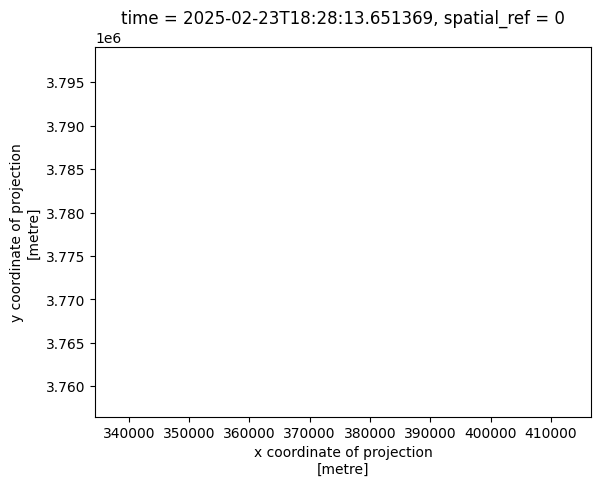

In [22]:
# Create an RGB image with the data
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

#### Why is our plot blank? 

Clouds' RGB values are outliers. The other values are not appearing when plotting below as the color scale is distorted. Adjustments must be made to remove the outliers from the clouds. 

Add the argument `robust = True` to remove the outliers from the plot. This uses the 2nd and 98th percentiles of the data to calculate the color limits according to the xarray documentation.

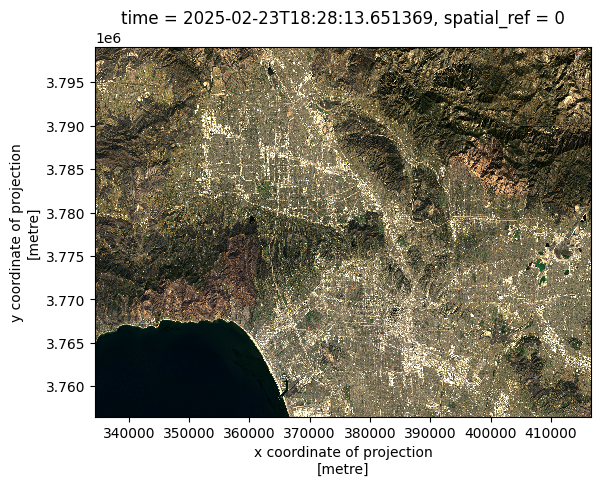

In [23]:
# Create an RGB image with the data removing outliers
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

#### What is the additional warning indicating?

The warning above is indicating that `nan` values are present in the data. Identify which bands have `nan` values. 

In [24]:
# Locate where any `nan` values are in the Landsat data
landsat[['red', 'green', 'blue']].to_array().isnull().sum()

<xarray.DataArray ()> Size: 8B
array(110)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

#### Where are there `nan` values?

The `nan` values are in array 110. Substitute the `nan` values with zero.

In [25]:
# Fill `nan` values for the RGB bands
landsat_clean = landsat[['red', 'green', 'blue']].to_array().fillna(value = 0)

Map the true color image without warnings. 

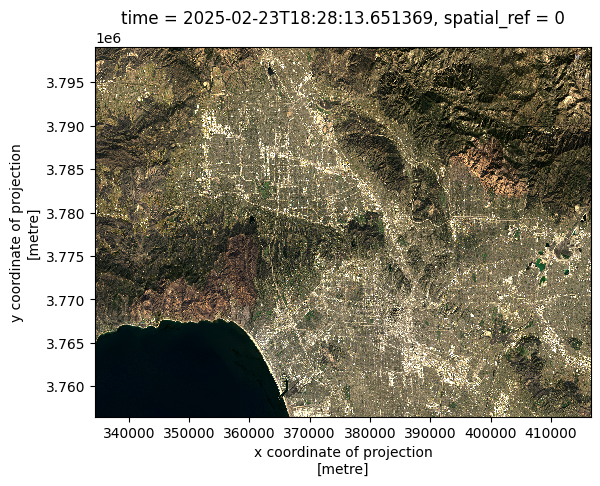

In [26]:
# RGB map without outliers
landsat_clean.plot.imshow(robust = True)

#### Plot difference explanation
The initial plot `landsat[['red', 'green', 'blue']].to_array().plot.imshow()` shows a white plot since there are outlier values caused by clouds. There are also `nan` values that cause an additional warning message. The plot created with the code `landsat_clean.plot.imshow(robust = True)` is based on a cleaned dataset that fills all na values with zero. Additionally, `robust = TRUE` removes outliers and makes a map based on the 2nd and 98th percentile values.

## False color image

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

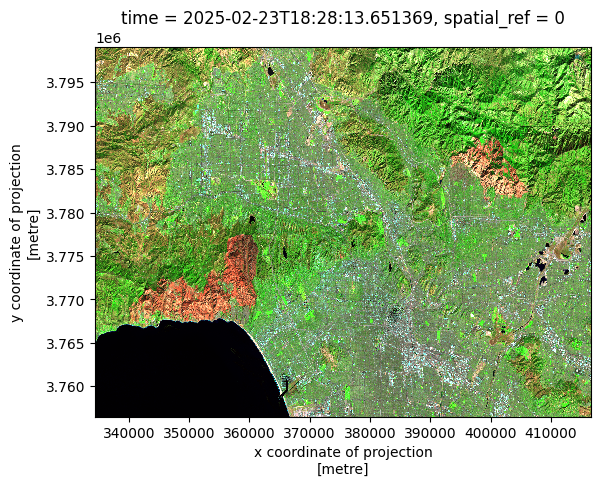

In [27]:
# Map false colors for the Landsat data
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

## Map

Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

The CRSs must all be the same in order to plot them together. Check the CRS for all of the map attributes and adjust them as needed.

In [28]:
# Check the CRSs
print('landsat CRS: ', landsat.rio.crs)
print('Eaton fire CRS: ', eaton_fire.crs)
print('Palisades fire CRS: ', palisades_fire.crs)

landsat CRS:  EPSG:32611
Eaton fire CRS:  EPSG:3857
Palisades fire CRS:  EPSG:3857


In [29]:
# Reproject fire perimeter to the Landsat to crs
eaton_fire = eaton_fire.to_crs(landsat.rio.crs)
palisades_fire = palisades_fire.to_crs(landsat.rio.crs)

# Confirm the CRSs all match
assert eaton_fire.crs == landsat.rio.crs
assert palisades_fire.crs == landsat.rio.crs

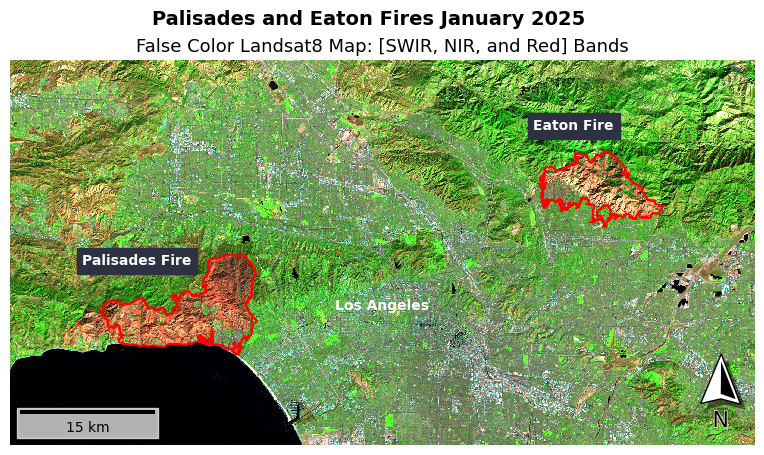

In [35]:
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(11, 5))
ax.axis('off')

# False color map 
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, 
                                                           robust = True)

# Map Eaton Fire perimeter 
eaton_fire.plot(ax = ax, 
                zorder =1,
                color = 'none', 
                edgecolor='red',
                linewidth = 1.5
               )

# Map Palisades Fire perimeter
palisades_fire.plot(ax = ax, 
                    zorder= 2,
                    color = 'none', 
                    edgecolor='red',
                    linewidth = 1.5
                   )

# Add an Eaton Fire label
plt.figtext(x = .65,
            y = .74,
            s ="Eaton Fire",
            weight = 'bold',
           color = "white", 
           backgroundcolor =  "#2D3142")

# Add a Palisade Fire label
plt.figtext(x = .24,
            y = .47,
            s ="Palisades Fire",
            weight = 'bold',
           color = "white", 
           backgroundcolor =  "#2D3142")

# Add a Los Angeles label as a reference
plt.figtext(x = .47,
            y = .38,
            s ="Los Angeles",
            weight = 'bold',
           color = "white")

# Add a title 
ax.set_title('False Color Landsat8 Map: [SWIR, NIR, and Red] Bands', fontsize = 13)
plt.suptitle('Palisades and Eaton Fires January 2025',  fontsize = 14, fontweight = 'bold')

# Add a scalebar 
ax.add_artist(ScaleBar(1, location = "lower left",box_alpha = 0.7, border_pad = 0.5))

# Add a north arrow
north_arrow(ax=ax, location="lower right", rotation={"crs":32611, "reference":"center"})

plt.show()

#### Map summary

The map above depicts false color imagery for the Eaton and Palisades Fires that took place in January 2025. Landsat raster data was mapped using the shortwave infrared, near-infrared, and red bands to create a false color imagery map. The red on the map despicts fire scars caused by the Eaton and Palisades Fires as the labels show. The green in the map above shows the areas without burn scars while bright green depicts vegetation. Bodies of water including the Pacific Ocean are shown in black in this false imagery. False imagery is being used to more dramatically show the effects of fire on the landscape. 

## Refrences

Earth Resources Observation and Science (EROS) Center. (2020). Landsat 8-9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2 [dataset]. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6


NIFC FIRIS(2025).Palisades and Eaton Dissolved Fire Perimeters (2025) [Shapefile]. County of Los Angeles. Retrieved November 17, 2025 from https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about.
